In [44]:
import pandas as pd
import geopandas as gpd

In [45]:
pd.set_option('display.max_rows', None)

In [8]:
!ls

Demo Geopandas.ipynb   WijkBuurtkaart_2022_v1 knmi.csv
KNMI.ipynb             demo matpltlib.ipynb   opdracht pandas.ipynb
Pandas.ipynb           demo numpy.ipynb       uit.csv


In [4]:
filename = 'WijkBuurtkaart_2022_v1/gemeente_2022_v1.shp'
try:
    nederland = gpd.read_file(filename)
except:
    print('Can not open shape file.')

<AxesSubplot: >

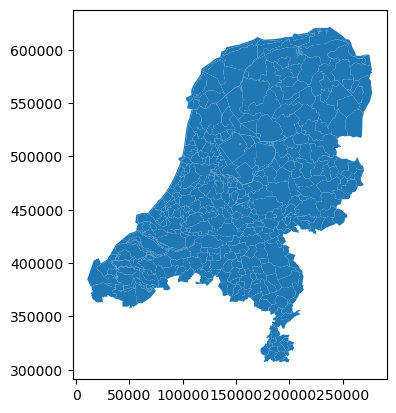

In [5]:
nederland.plot()

In [46]:
nederland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GM_CODE     428 non-null    object  
 1   GM_NAAM     428 non-null    object  
 2   H2O         428 non-null    object  
 3   OAD         428 non-null    int64   
 4   STED        428 non-null    int64   
 5   BEV_DICHTH  428 non-null    int64   
 6   AANT_INW    428 non-null    int64   
 7   AANT_MAN    428 non-null    int64   
 8   AANT_VROUW  428 non-null    int64   
 9   P_00_14_JR  428 non-null    int64   
 10  P_15_24_JR  428 non-null    int64   
 11  P_25_44_JR  428 non-null    int64   
 12  P_45_64_JR  428 non-null    int64   
 13  P_65_EO_JR  428 non-null    int64   
 14  P_ONGEHUWD  428 non-null    int64   
 15  P_GEHUWD    428 non-null    int64   
 16  P_GESCHEID  428 non-null    int64   
 17  P_VERWEDUW  428 non-null    int64   
 18  AANTAL_HH   428 non-null    int64   
 19  

In [11]:
land = nederland[nederland['H2O']=='NEE'].copy()

<AxesSubplot: >

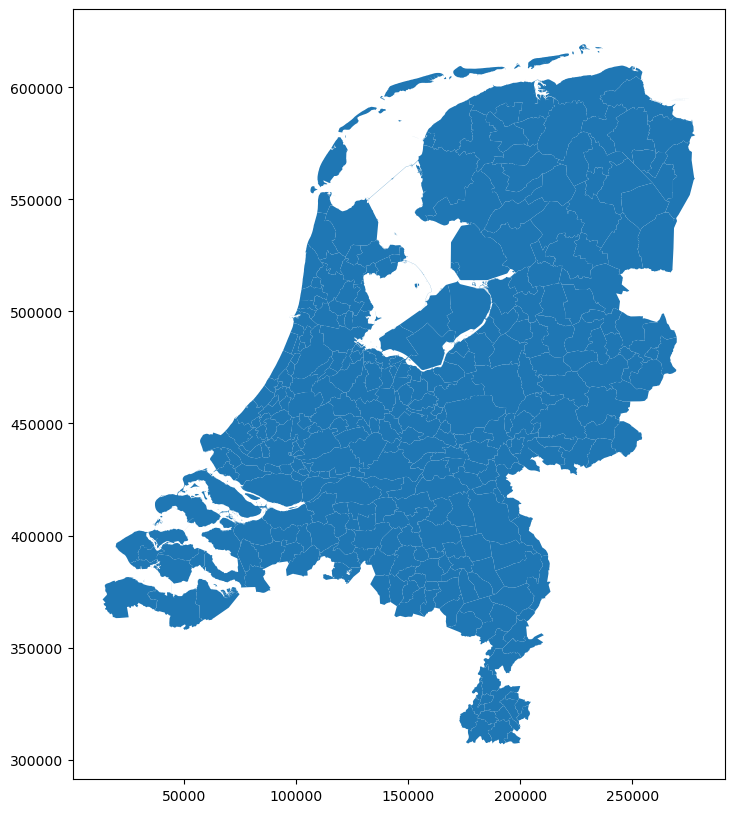

In [13]:
land.plot(figsize=(10, 10))

<AxesSubplot: >

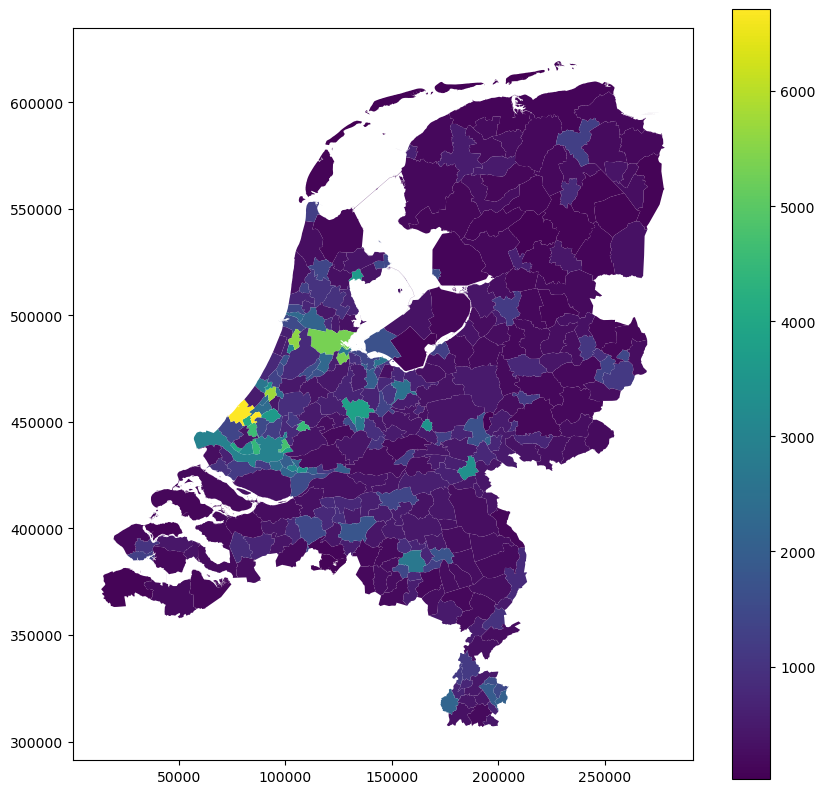

In [17]:
land.plot(column='BEV_DICHTH', figsize=(10, 10), legend=True)

In [24]:
land.sort_values('BEV_DICHTH', ascending=True)['GM_NAAM'].head(10)

411    Schiermonnikoog
155           Vlieland
404       Terschelling
420          Rozendaal
169            Ameland
168         Westerveld
83               Sluis
103              Texel
164     Noord-Beveland
250      Baarle-Nassau
Name: GM_NAAM, dtype: object

In [25]:
land.sort_values('BEV_DICHTH', ascending=False)['GM_NAAM'].head(10)

309             's-Gravenhage
293                    Leiden
400                   Haarlem
280                 Amsterdam
171    Capelle aan den IJssel
284                     Delft
193                     Gouda
163                  Schiedam
184                  Rijswijk
206                 Maassluis
Name: GM_NAAM, dtype: object

In [47]:
land[['GM_CODE','GM_NAAM','BEV_DICHTH','AANT_INW','OPP_LAND']].sort_values('BEV_DICHTH', ascending=False).tail(10)

,GM_CODE,GM_NAAM,BEV_DICHTH,AANT_INW,OPP_LAND
250,GM0744,Baarle-Nassau,91,6931,7612
164,GM1695,Noord-Beveland,89,7668,8600
103,GM0448,Texel,84,13687,16226
83,GM1714,Sluis,83,23141,27860
168,GM1701,Westerveld,71,19854,27865
169,GM0060,Ameland,66,3757,5659
420,GM0277,Rozendaal,63,1756,2790
404,GM0093,Terschelling,57,4960,8721
155,GM0096,Vlieland,29,1195,4184
411,GM0088,Schiermonnikoog,22,944,4293


In [48]:
land['MAN_VROUW'] = land['AANT_MAN'] / land['AANT_VROUW']

In [49]:
land[['GM_CODE','GM_NAAM','AANT_INW','AANT_MAN','AANT_VROUW','MAN_VROUW']]

,GM_CODE,GM_NAAM,AANT_INW,AANT_MAN,AANT_VROUW,MAN_VROUW
83,GM1714,Sluis,23141,11478,11663,0.984138
84,GM1892,Zuidplas,45794,22750,23044,0.987242
85,GM0852,Waterland,17343,8500,8843,0.961212
86,GM0289,Wageningen,39939,19169,20770,0.922918
87,GM0164,Hengelo,81476,41062,40414,1.016034
88,GM1659,Laarbeek,22943,11606,11337,1.023728
89,GM0047,Veendam,27466,13737,13729,1.000583
90,GM0944,Mook en Middelaar,7989,3948,4041,0.976986
91,GM0451,Uithoorn,31018,15250,15768,0.967149
92,GM0059,Achtkarspelen,27954,14259,13695,1.041183


<AxesSubplot: >

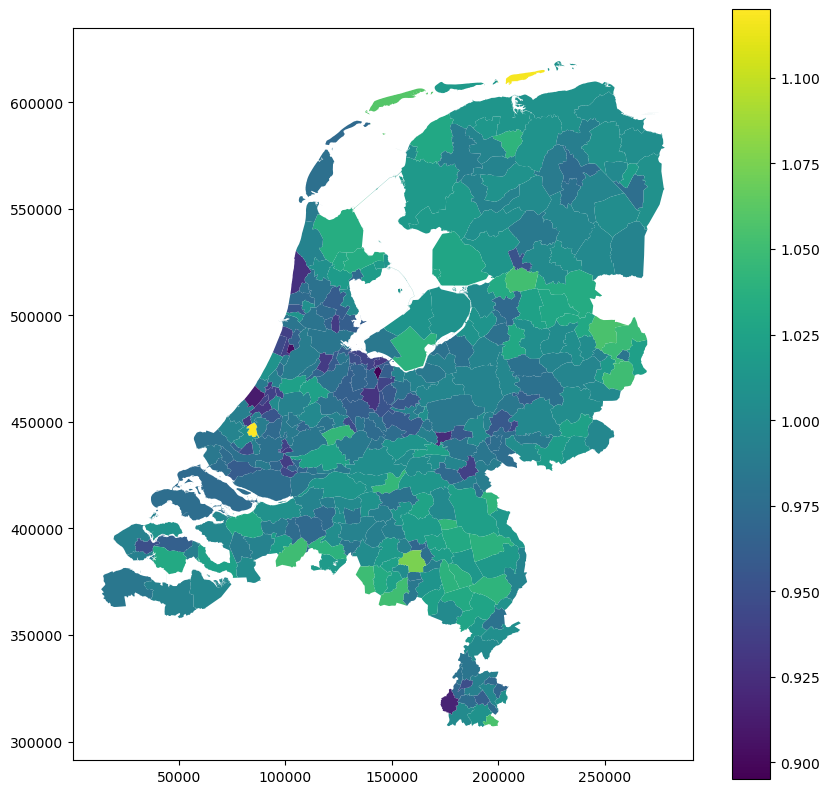

In [50]:
land.plot(column='MAN_VROUW', figsize=(10, 10), legend=True)

In [51]:
land[['GM_CODE','GM_NAAM','AANT_MAN','AANT_VROUW','MAN_VROUW']].sort_values('MAN_VROUW', ascending=False).head(10)

,GM_CODE,GM_NAAM,AANT_MAN,AANT_VROUW,MAN_VROUW
284,GM0503,Delft,55248,49324,1.120104
411,GM0088,Schiermonnikoog,498,446,1.116592
325,GM0772,Eindhoven,123455,114871,1.074727
404,GM0093,Terschelling,2552,2408,1.059801
426,GM0981,Vaals,5205,4930,1.055781
102,GM0183,Tubbergen,10970,10394,1.055417
282,GM0180,Staphorst,8861,8421,1.052250
191,GM1724,Bergeijk,9673,9206,1.050728
251,GM0879,Zundert,11405,10855,1.050668
99,GM0153,Enschede,82272,78368,1.049816


In [52]:
land[['GM_CODE','GM_NAAM','AANT_MAN','AANT_VROUW','MAN_VROUW']].sort_values('MAN_VROUW', ascending=True).head(10)

,GM_CODE,GM_NAAM,AANT_MAN,AANT_VROUW,MAN_VROUW
249,GM0417,Laren,5445,6083,0.895118
382,GM0397,Heemstede,13078,14479,0.903239
323,GM0629,Wassenaar,12930,14185,0.911526
374,GM0935,Maastricht,57943,63208,0.916704
86,GM0289,Wageningen,19169,20770,0.922918
205,GM0373,Bergen (NH.),14290,15433,0.925938
106,GM0310,De Bilt,20952,22556,0.928888
186,GM1916,Leidschendam-Voorburg,36934,39725,0.929742
393,GM0406,Huizen,19737,21201,0.930947
184,GM0603,Rijswijk,27464,29477,0.931709
